In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import math
from sklearn.preprocessing import MinMaxScaler

In [63]:
df = pd.read_csv("Walmart_sales.csv")

In [64]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit
0,1.0,05-02-2010,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83
1,1.0,12-02-2010,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06
2,NaN,19-02-2010,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39
3,1.0,26-02-2010,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99
4,1.0,05-03-2010,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94
...,...,...,...,...,...,...,...,...,...
6430,45.0,28-09-2012,713173.95,0.0,64.88,NaN,NaN,9.0,NaN
6431,45.0,05-10-2012,733455.07,0.0,64.89,NaN,192.170412,9.0,NaN
6432,45.0,12-10-2012,734464.36,0.0,54.47,NaN,192.327265,9.0,NaN
6433,45.0,19-10-2012,718125.53,0.0,56.47,NaN,192.330854,9.0,NaN


In [65]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit
0,1.0,05-02-2010,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83
1,1.0,12-02-2010,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06
2,NaN,19-02-2010,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39
3,1.0,26-02-2010,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99
4,1.0,05-03-2010,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94


In [66]:
dff = df.copy()

In [67]:
dff['Date'] = pd.to_datetime(dff['Date'],format="%d-%m-%Y")

In [68]:
dff.head(4)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit
0,1.0,2010-02-05,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83
1,1.0,2010-02-12,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06
2,NaN,2010-02-19,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39
3,1.0,2010-02-26,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99


In [69]:
dff['month'] = dff['Date'].dt.month
dff['year'] = dff['Date'].dt.year
dff['Week'] = dff['Date'].dt.isocalendar().week
dff['DATE'] = dff['Date'].dt.day

In [70]:
dff = dff.drop('Date', axis=1)

In [71]:
dff.head(20)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,month,year,Week,DATE
0,1.0,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83,2,2010,5,5
1,1.0,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06,2,2010,6,12
2,NaN,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39,2,2010,7,19
3,1.0,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99,2,2010,8,26
4,1.0,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94,3,2010,9,5
5,1.0,1439541.59,0.0,57.79,NaN,211.380643,8.0,156991.12,3,2010,10,12
6,1.0,1472515.79,0.0,54.58,NaN,211.215635,8.0,156122.51,3,2010,11,19
7,1.0,1404429.92,0.0,NaN,NaN,211.018042,8.0,155752.60,3,2010,12,26
8,1.0,1594968.28,0.0,62.27,NaN,210.820450,8.0,152211.77,4,2010,13,2
9,NaN,1545418.53,0.0,65.86,NaN,210.622857,8.0,149759.96,4,2010,14,9


In [72]:
dff.tail(10)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,month,year,Week,DATE
6425,45.0,718232.26,0.0,72.62,3.834,191.344887,9.0,NaN,8,2012,34,24
6426,45.0,734297.87,0.0,75.09,NaN,NaN,9.0,NaN,8,2012,35,31
6427,45.0,766512.66,1.0,75.70,NaN,191.577676,9.0,NaN,9,2012,36,7
6428,45.0,702238.27,0.0,67.87,NaN,191.699850,9.0,NaN,9,2012,37,14
6429,45.0,723086.20,0.0,65.32,NaN,191.856704,9.0,NaN,9,2012,38,21
6430,45.0,713173.95,0.0,64.88,NaN,NaN,9.0,NaN,9,2012,39,28
6431,45.0,733455.07,0.0,64.89,NaN,192.170412,9.0,NaN,10,2012,40,5
6432,45.0,734464.36,0.0,54.47,NaN,192.327265,9.0,NaN,10,2012,41,12
6433,45.0,718125.53,0.0,56.47,NaN,192.330854,9.0,NaN,10,2012,42,19
6434,45.0,760281.43,0.0,58.85,NaN,192.308899,9.0,NaN,10,2012,43,26


In [73]:
# z = dff['Weekly_Sales'].mean()
# print("The Average Weekly Sales of Walmart is: ",z)

In [74]:
dff.isna().sum()

Store            46
Weekly_Sales      0
Holiday_Flag    128
Temperature     140
Fuel_Price       60
CPI              35
Unemployment    218
Profit          202
month             0
year              0
Week              0
DATE              0
dtype: int64

In [75]:
dff.isnull().mean()*100

Store           0.714841
Weekly_Sales    0.000000
Holiday_Flag    1.989122
Temperature     2.175602
Fuel_Price      0.932401
CPI             0.543901
Unemployment    3.387723
Profit          3.139083
month           0.000000
year            0.000000
Week            0.000000
DATE            0.000000
dtype: float64

In [76]:
## To fetch the colunms with the particular criteria.
list = [col for col in dff.columns if dff[col].isnull().mean() <0.01 and dff[col].isnull().mean()>0]
list

['Store', 'Fuel_Price', 'CPI']

In [77]:
dff.dropna(subset = list[2], inplace = True)

Text(0.5, 1.0, 'Fuel_Price')

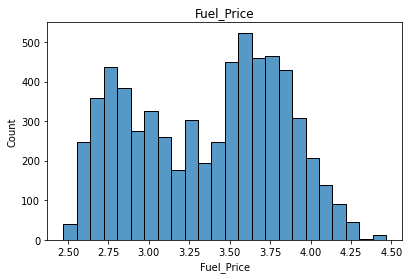

In [78]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(df['Fuel_Price'])
plt.title('Fuel_Price')

In [79]:
dff['Fuel_Price'].fillna(dff['Fuel_Price'].max(), inplace=True)

In [80]:
dff['Fuel_Price'].fillna(dff['Fuel_Price'].min(), inplace=True)

In [81]:
dff.isna().sum()

Store            46
Weekly_Sales      0
Holiday_Flag    121
Temperature     135
Fuel_Price        0
CPI               0
Unemployment    215
Profit          192
month             0
year              0
Week              0
DATE              0
dtype: int64

Text(0.5, 1.0, 'Fuel_Price')

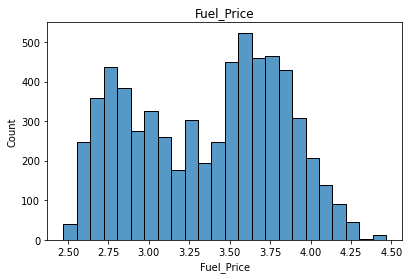

In [82]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(df['Fuel_Price'])
plt.title('Fuel_Price')

In [83]:
dff.isna().sum()

Store            46
Weekly_Sales      0
Holiday_Flag    121
Temperature     135
Fuel_Price        0
CPI               0
Unemployment    215
Profit          192
month             0
year              0
Week              0
DATE              0
dtype: int64

/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Unemployment')

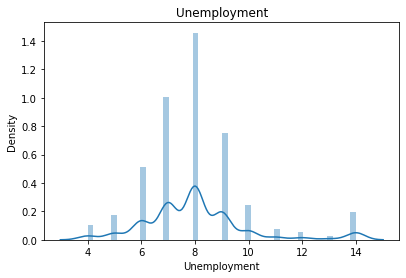

In [84]:
plt.figure(figsize = (14,4))
plt.subplot(122)
sns.distplot(dff['Unemployment'])
plt.title('Unemployment')

In [85]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with median strategy
si = SimpleImputer(strategy='most_frequent')
dff['Unemployment'] = si.fit_transform(dff[['Unemployment']])

# Display the DataFrame after imputation
dff

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,month,year,Week,DATE
0,1.0,1643690.90,0.0,42.31,4.468,211.096358,8.0,192261.83,2,2010,5,5
1,1.0,1641957.44,1.0,38.51,4.468,211.242170,8.0,191792.06,2,2010,6,12
2,NaN,1611968.17,0.0,39.93,4.468,211.289143,8.0,191050.39,2,2010,7,19
3,1.0,1409727.59,0.0,46.63,4.468,211.319643,8.0,182901.99,2,2010,8,26
4,1.0,1554806.68,0.0,46.50,4.468,211.350143,8.0,166187.94,3,2010,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6429,45.0,723086.20,0.0,65.32,4.468,191.856704,9.0,NaN,9,2012,38,21
6431,45.0,733455.07,0.0,64.89,4.468,192.170412,9.0,NaN,10,2012,40,5
6432,45.0,734464.36,0.0,54.47,4.468,192.327265,9.0,NaN,10,2012,41,12
6433,45.0,718125.53,0.0,56.47,4.468,192.330854,9.0,NaN,10,2012,42,19


In [86]:
dff.isna().sum()

Store            46
Weekly_Sales      0
Holiday_Flag    121
Temperature     135
Fuel_Price        0
CPI               0
Unemployment      0
Profit          192
month             0
year              0
Week              0
DATE              0
dtype: int64

/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Profit')

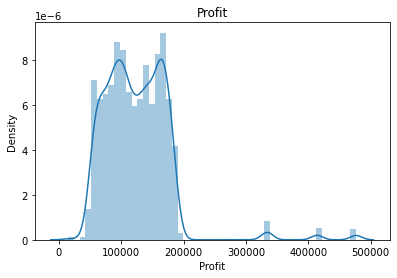

In [87]:
plt.figure(figsize = (14,4))
plt.subplot(122)
sns.distplot(dff['Profit'])
plt.title('Profit')

In [88]:
dff.tail(6)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,month,year,Week,DATE
6428,45.0,702238.27,0.0,67.87,4.468,191.699850,9.0,NaN,9,2012,37,14
6429,45.0,723086.20,0.0,65.32,4.468,191.856704,9.0,NaN,9,2012,38,21
6431,45.0,733455.07,0.0,64.89,4.468,192.170412,9.0,NaN,10,2012,40,5
6432,45.0,734464.36,0.0,54.47,4.468,192.327265,9.0,NaN,10,2012,41,12
6433,45.0,718125.53,0.0,56.47,4.468,192.330854,9.0,NaN,10,2012,42,19
6434,45.0,760281.43,0.0,58.85,4.468,192.308899,9.0,NaN,10,2012,43,26


In [89]:
## As more than last 60 values were missing, we use end distribution method to fill the missing values
dff['Profit'].fillna(dff['Profit'].max(), inplace=True)

In [90]:
dff.isna().sum()

Store            46
Weekly_Sales      0
Holiday_Flag    121
Temperature     135
Fuel_Price        0
CPI               0
Unemployment      0
Profit            0
month             0
year              0
Week              0
DATE              0
dtype: int64

In [91]:
dff.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,month,year,Week,DATE
0,1.0,1643690.90,0.0,42.31,4.468,211.096358,8.0,192261.83,2,2010,5,5
1,1.0,1641957.44,1.0,38.51,4.468,211.242170,8.0,191792.06,2,2010,6,12
2,NaN,1611968.17,0.0,39.93,4.468,211.289143,8.0,191050.39,2,2010,7,19
3,1.0,1409727.59,0.0,46.63,4.468,211.319643,8.0,182901.99,2,2010,8,26
4,1.0,1554806.68,0.0,46.50,4.468,211.350143,8.0,166187.94,3,2010,9,5


In [92]:
dff.tail()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,month,year,Week,DATE
6429,45.0,723086.20,0.0,65.32,4.468,191.856704,9.0,476485.43,9,2012,38,21
6431,45.0,733455.07,0.0,64.89,4.468,192.170412,9.0,476485.43,10,2012,40,5
6432,45.0,734464.36,0.0,54.47,4.468,192.327265,9.0,476485.43,10,2012,41,12
6433,45.0,718125.53,0.0,56.47,4.468,192.330854,9.0,476485.43,10,2012,42,19
6434,45.0,760281.43,0.0,58.85,4.468,192.308899,9.0,476485.43,10,2012,43,26


In [93]:
## Using Random Sampling in Holiday Flag as it consists of only 0s and 1s
def random_sampling_imputation(column):          
    non_missing_values = dff[column].dropna()        
    random_samples = np.random.choice(non_missing_values, size=dff[column].isnull().sum(), replace=True)
    dff.loc[dff[column].isnull(),column] = random_samples

In [94]:
random_sampling_imputation("Holiday_Flag")
random_sampling_imputation("Store")

In [95]:
dff.isna().sum()

Store             0
Weekly_Sales      0
Holiday_Flag      0
Temperature     135
Fuel_Price        0
CPI               0
Unemployment      0
Profit            0
month             0
year              0
Week              0
DATE              0
dtype: int64

/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperature')

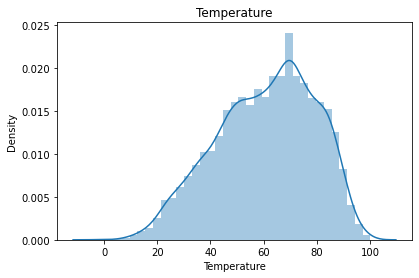

In [96]:
plt.figure(figsize = (14,4))
plt.subplot(122)
sns.distplot(dff['Temperature'])
plt.title('Temperature')

In [97]:
## Using median method to fill the missing values.
dff['Temperature'].fillna(dff['Temperature'].median(),inplace=True)

In [98]:
dff.isnull().mean()*100

Store           0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
Profit          0.0
month           0.0
year            0.0
Week            0.0
DATE            0.0
dtype: float64

In [99]:
dff.head(4)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,month,year,Week,DATE
0,1.0,1643690.90,0.0,42.31,4.468,211.096358,8.0,192261.83,2,2010,5,5
1,1.0,1641957.44,1.0,38.51,4.468,211.242170,8.0,191792.06,2,2010,6,12
2,26.0,1611968.17,0.0,39.93,4.468,211.289143,8.0,191050.39,2,2010,7,19
3,1.0,1409727.59,0.0,46.63,4.468,211.319643,8.0,182901.99,2,2010,8,26


In [100]:
# # Using Function Transformer
# tf = FunctionTransformer(func = np.log)
# # tff = FunctionTransformer(func = np.log1)


# ## Using Power Transformer
# pt = PowerTransformer(method = 'yeo-johnson')


# # pt = PowerTransformer(method = 'box-cox')
# # The Box-Cox transformation can only be applied to strictly positive data

/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


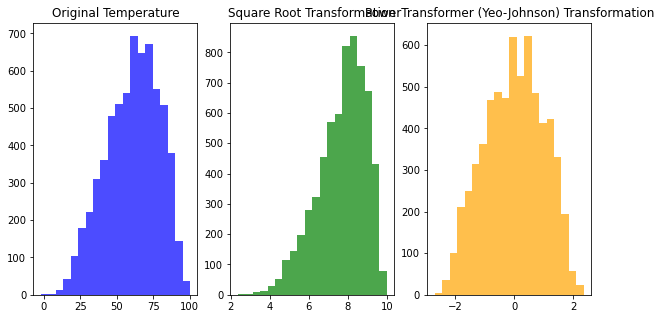

In [101]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
import matplotlib.pyplot as plt


# Using FunctionTransformer for square root transformation
tf = FunctionTransformer(func=np.sqrt)
dff['Temperature_sqrt'] = tf.transform(dff[['Temperature']])

# Using PowerTransformer for square root transformation
pt = PowerTransformer(method='yeo-johnson')
# Note: PowerTransformer requires a 2D array-like input, hence the double square brackets
dff['Temperature_sqrt_pt'] = pt.fit_transform(dff[['Temperature']])

# Plotting the original and transformed data
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.hist(dff['Temperature'], bins=20, color='blue', alpha=0.7)
plt.title('Original Temperature')

plt.subplot(1, 3, 2)
plt.hist(dff['Temperature_sqrt'], bins=20, color='green', alpha=0.7)
plt.title('Square Root Transformation')

plt.subplot(1, 3, 3)
plt.hist(dff['Temperature_sqrt_pt'], bins=20, color='orange', alpha=0.7)
plt.title('PowerTransformer (Yeo-Johnson) Transformation')

plt.show()


In [102]:
X = dff.drop(["Profit", "Week", "Temperature", "Temperature_sqrt"], axis=1)
y = dff["Profit"]

In [103]:
X

,Store,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,month,year,DATE,Temperature_sqrt_pt
0,1.0,1643690.90,0.0,4.468,211.096358,8.0,2,2010,5,-1.037032
1,1.0,1641957.44,1.0,4.468,211.242170,8.0,2,2010,12,-1.224627
2,26.0,1611968.17,0.0,4.468,211.289143,8.0,2,2010,19,-1.155180
3,1.0,1409727.59,0.0,4.468,211.319643,8.0,2,2010,26,-0.817209
4,1.0,1554806.68,0.0,4.468,211.350143,8.0,3,2010,5,-0.823922
...,...,...,...,...,...,...,...,...,...,...
6429,45.0,723086.20,0.0,4.468,191.856704,9.0,9,2012,21,0.204970
6431,45.0,733455.07,0.0,4.468,192.170412,9.0,10,2012,5,0.180268
6432,45.0,734464.36,0.0,4.468,192.327265,9.0,10,2012,12,-0.401778
6433,45.0,718125.53,0.0,4.468,192.330854,9.0,10,2012,19,-0.292604


In [52]:
y

0       192261.83
1       191792.06
2       191050.39
3       182901.99
4       166187.94
          ...    
6429    476485.43
6431    476485.43
6432    476485.43
6433    476485.43
6434    476485.43
Name: Profit, Length: 6400, dtype: float64

In [53]:
dff.isnull().mean()*100

Store                  0.000000
Weekly_Sales           0.000000
Holiday_Flag           0.000000
Temperature            0.000000
Fuel_Price             0.000000
CPI                    0.000000
Unemployment           0.000000
Profit                 0.000000
month                  0.000000
year                   0.000000
Week                   0.000000
DATE                   0.000000
Temperature_sqrt       0.015625
Temperature_sqrt_pt    0.000000
dtype: float64

In [109]:
list = [col for col in dff.columns if dff[col].isnull().mean() <0.01 and dff[col].isnull().mean()>0]
list

['Temperature_sqrt']

In [112]:
dff.dropna(subset = list[0], inplace = True)

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [114]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [115]:
y_pred = model.predict(X_test)

print('MAE', mean_absolute_error(y_test,y_pred))
print('MSE', mean_squared_error(y_test,y_pred))
print('R2 Score', r2_score(y_test,y_pred))

MAE 50900.25325838728
MSE 5693457105.641695
R2 Score 0.0904031436648578
